```sql
SELECT count(id) FROM nisponno_records where Date(operation_date) >= '2020-09-01' and Date(operation_date) <= '2020-09-30'  and type != 'potrojari';
```

In [1]:
# import necessary library
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import copy
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
nisponno_records_table_columns_dict = {
    '1': 'id',
    '2': 'nothi_master_id',
    '3': 'nothi_part_no',
    '4': 'type',
    '5': 'nothi_onucched_id',
    '6': 'potrojari_id',
    '7': 'nothi_office_id',
    '8': 'office_id',
    '9': 'unit_id',
    '10': 'designation_id',
    '11': 'employee_id',
    '12': 'upokarvogi',
    '13': 'potrojari_internal_own',
    '14': 'potrojari_internal_other',
    '15': 'dak_srijito',
    '16': 'operation_date',
    '17': 'created',
    '18': 'modified'
}
nisponno_records_table_columns_list = list(nisponno_records_table_columns_dict.values())
nisponno_records_table_columns = nisponno_records_table_columns_list
# for key in nisponno_records_table_columns_dict.keys():
#     value = 

len(nisponno_records_table_columns)


18

### Check column length consistency

In [3]:
nisponno_records_df = pd.read_csv('../Data/nisponno_records.csv')
if len(nisponno_records_table_columns) != nisponno_records_df.shape[1]: 
    print(f"previous column length: {len(nisponno_records_table_columns)}, current column_length {nisponno_records_df.shape[1]}")
    raise ValueError('office table attribute added or removed')

In [3]:
def load_nisponno_records_df():
    nisponno_records_df = pd.read_csv('../Data/nisponno_records_24_11_2021.csv', names=nisponno_records_table_columns)
    return nisponno_records_df

In [19]:
nisponno_records_df = load_nisponno_records_df()
nisponno_records_df.head()

,id,nothi_master_id,nothi_part_no,type,nothi_onucched_id,potrojari_id,nothi_office_id,office_id,unit_id,designation_id,employee_id,upokarvogi,potrojari_internal_own,potrojari_internal_other,dak_srijito,operation_date,created,modified
0,16759666,1882,4082,potrojari,9394,1408,6243,6243,23005,735461,269390,2,1,0,0,2021-07-27 21:25:19,2021-07-27 21:23:19,2021-07-27 21:23:19
1,16759669,2377,76481,potrojari,180366,40403,561,561,7496,37436,85400,4,0,1,0,2021-07-27 21:27:18,2021-07-27 21:25:18,2021-07-27 21:25:18
2,16759671,11397,165184,potrojari,531461,76074,5499,5499,37692,220277,114368,5,1,0,0,2021-07-27 21:29:13,2021-07-27 21:27:13,2021-07-27 21:27:13
3,16759674,2293,8131,note,1,0,16765,16765,101555,814770,79406,0,0,0,1,2021-07-27 21:26:43,2021-07-27 21:24:43,2021-07-27 21:24:43
4,16759677,1638,34328,potrojari,156540,16462,4534,4534,18960,101381,112943,3,0,1,0,2021-07-27 21:28:49,2021-07-27 21:26:49,2021-07-27 21:26:49


In [5]:
# observing dataframe size
nisponno_records_df.shape
nisponno_records_df.size

(999999, 18)

17999982

In [21]:
# observing missing values, datatype, dataframe memory size
nisponno_records_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   id                        1000000 non-null  int64 
 1   nothi_master_id           1000000 non-null  int64 
 2   nothi_part_no             1000000 non-null  int64 
 3   type                      1000000 non-null  object
 4   nothi_onucched_id         1000000 non-null  int64 
 5   potrojari_id              1000000 non-null  int64 
 6   nothi_office_id           1000000 non-null  int64 
 7   office_id                 1000000 non-null  int64 
 8   unit_id                   1000000 non-null  int64 
 9   designation_id            1000000 non-null  int64 
 10  employee_id               1000000 non-null  int64 
 11  upokarvogi                1000000 non-null  int64 
 12  potrojari_internal_own    1000000 non-null  int64 
 13  potrojari_internal_other  1000000 non-null 

In [22]:
# observing null value of every attribute
nisponno_records_df.isnull().sum()

id                          0
nothi_master_id             0
nothi_part_no               0
type                        0
nothi_onucched_id           0
potrojari_id                0
nothi_office_id             0
office_id                   0
unit_id                     0
designation_id              0
employee_id                 0
upokarvogi                  0
potrojari_internal_own      0
potrojari_internal_other    0
dak_srijito                 0
operation_date              0
created                     0
modified                    0
dtype: int64

## মোট নিষ্পন্ন

In [23]:
total_nisponno_df = nisponno_records_df.loc[nisponno_records_df.type != 'potrojari'].copy()
# abc = nisponno_records_df[nisponno_records_df.type != 'potrojari']
# total_nisponno_df = copy.deepcopy(total_nisponno_df)
total_nisponno_df.shape

(619849, 18)

In [4]:
# SELECT count(id) FROM nisponno_records where Date(operation_date) >= '2020-09-01' and Date(operation_date) <= '2020-09-30'  and type != 'potrojari';

# Extract mandatory attributes for offices graph analysis
nisponno_records_df = load_nisponno_records_df()
print(f"Initial dataframe shape {nisponno_records_df.shape}")

nisponno_records_df = nisponno_records_df[['id', 'type', 'operation_date']] 
print(f"Initial dataframe shape {nisponno_records_df.shape}")

total_nisponno_df = nisponno_records_df.loc[nisponno_records_df.type != 'potrojari'].copy()
# remove null values
total_nisponno_df = total_nisponno_df.loc[total_nisponno_df.operation_date.notnull()]
print(f"dataframe shape after removing operation_date null value {total_nisponno_df.shape}")
# add new column: cretead_new as datetime field from operation_date column
total_nisponno_df['operation_date'] = pd.to_datetime(total_nisponno_df['operation_date'], errors='coerce')
# errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
    # If ‘raise’, then invalid parsing will raise an exception.
    # If ‘coerce’, then invalid parsing will be set as NaT.
    # If ‘ignore’, then invalid parsing will return the input.
total_nisponno_df.shape
# again remove null values based on opeation_date field
total_nisponno_df = total_nisponno_df.loc[total_nisponno_df.operation_date.notnull()]
total_nisponno_df.shape

Initial dataframe shape (16416402, 18)
Initial dataframe shape (16416402, 3)
dataframe shape after removing operation_date null value (10704615, 3)


(10704615, 3)

(10704615, 3)

In [5]:
# Extract years and months from created column
operation_date_datetime_index = pd.DatetimeIndex(total_nisponno_df['operation_date'])
years = operation_date_datetime_index.year.values.astype(str)
months = operation_date_datetime_index.month.values.astype(str)
type(years)
type(months)
set(years)
set(months)

numpy.ndarray

numpy.ndarray

{'2016', '2017', '2018', '2019', '2020', '2021'}

{'1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9'}

In [6]:
# type(years[0])
total_nisponno_df['year'] = years
total_nisponno_df['month'] = months
total_nisponno_df.shape

(10704615, 5)

In [7]:
# save the new dataframe as csv
total_nisponno_df.to_csv('../Cleaned_data/total_nisponno.csv', index=False)

In [8]:
# observe number of offices in every year 
total_nisponno_year_by = total_nisponno_df.groupby('year')['year'].count()
total_nisponno_year_by

year
2016      57907
2017     902376
2018    1976310
2019    3377961
2020    3154105
2021    1235956
Name: year, dtype: int64

(array([  57907.,       0.,  902376.,       0., 1976310.,       0.,
        3377961.,       0., 3154105., 1235956.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'years')

Text(0, 0.5, 'Number of offices')

Text(0.5, 1.0, 'Offices in year base')

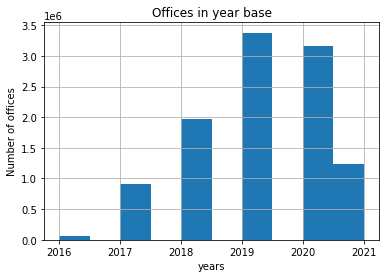

In [9]:
plt.hist(total_nisponno_df['year'])


plt.xlabel('years')
plt.ylabel('Number of offices')
plt.title('Offices in year base')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

In [11]:
month_map ={
    '1': 'January',
    '01': 'January',
    '2': 'February',
    '02': 'February',
    '3': 'March',
    '03': 'March',
    '4': 'April',
    '04': 'April',
    '5': 'May',
    '05': 'May',
    '6': 'June',
    '06': 'June',
    '7': 'July',
    '07': 'July',
    '8': 'August',
    '08': 'August',
    '9': 'September',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December',
    'unknown': 'unknown',
}

In [12]:
# Generate general_series and drilldown series for bar graph
# general series: year: number of officess
dataframe_year_by = total_nisponno_df.groupby('year')

def generate_general_series_drilldown_series(dataframe_year_by, general_series_name):
    general_series = [
        
        {
            'name': general_series_name,
            'colorByPoint': True,
            'data': [],
        }
    ]
    drilldown_series = []

    for year, year_frame in dataframe_year_by:
        year = str(year)
        # year, year_frame.shape
        temporary_dict_general = {'name': year, 'y': year_frame.shape[0], 'drilldown': year}
        general_series[0]['data'].append(temporary_dict_general)
        temporary_dict_drilldown = {
            'name': year,
            'id': year,
            'data': [],
        }
        month_group_by = year_frame.groupby('month')
        for month, month_frame in month_group_by:
          
            # mg, mf.shape[0]
            month = str(month)
            month = month_map[month]

            lst = [month, month_frame.shape[0]]
            # lst = [month, month_frame['upokarvogi'].sum()]
            temporary_dict_drilldown['data'].append(lst)
        drilldown_series.append(temporary_dict_drilldown)
    return general_series, drilldown_series

general_series, drilldown_series = generate_general_series_drilldown_series(dataframe_year_by, 'years')


In [13]:
general_series
drilldown_series

[{'name': 'years',
  'colorByPoint': True,
  'data': [{'name': '2016', 'y': 57907, 'drilldown': '2016'},
   {'name': '2017', 'y': 902376, 'drilldown': '2017'},
   {'name': '2018', 'y': 1976310, 'drilldown': '2018'},
   {'name': '2019', 'y': 3377961, 'drilldown': '2019'},
   {'name': '2020', 'y': 3154105, 'drilldown': '2020'},
   {'name': '2021', 'y': 1235956, 'drilldown': '2021'}]}]

[{'name': '2016',
  'id': '2016',
  'data': [['October', 2636],
   ['November', 7187],
   ['December', 43081],
   ['February', 27],
   ['March', 143],
   ['April', 79],
   ['May', 190],
   ['June', 349],
   ['July', 416],
   ['August', 2230],
   ['September', 1569]]},
 {'name': '2017',
  'id': '2017',
  'data': [['January', 28604],
   ['October', 115932],
   ['November', 135833],
   ['December', 132680],
   ['February', 35324],
   ['March', 39887],
   ['April', 58558],
   ['May', 53426],
   ['June', 41555],
   ['July', 86557],
   ['August', 96639],
   ['September', 77381]]},
 {'name': '2018',
  'id': '2018',
  'data': [['January', 145152],
   ['October', 200344],
   ['November', 195654],
   ['December', 200237],
   ['February', 121707],
   ['March', 139639],
   ['April', 159190],
   ['May', 167199],
   ['June', 146494],
   ['July', 157157],
   ['August', 158835],
   ['September', 184702]]},
 {'name': '2019',
  'id': '2019',
  'data': [['January', 237871],
   ['October', 399236],
   ['N

In [14]:
month_list =['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October','November', 'December', 'unknown' ]
total_nisponno = {}

dataframe_year_by = total_nisponno_df.groupby('year')

for year, year_frame in dataframe_year_by:
    year = str(year)
    # year, year_frame.shape
    
    month_dict = {}

    month_group_by = year_frame.groupby('month')
    for month, month_frame in month_group_by:

        # mg, mf.shape[0]
        month = str(month)
        month = month_map[month]
        month_dict[month] = int(month_frame.shape[0])
    month_dict = dict(sorted(month_dict.items(), key=lambda x:month_list.index(x[0])))
    dic = {'count': int(year_frame.shape[0]), 'month_map': month_dict}
    total_nisponno[year] = dic

print(total_nisponno)

{'2016': {'count': 57907, 'month_map': {'February': 27, 'March': 143, 'April': 79, 'May': 190, 'June': 349, 'July': 416, 'August': 2230, 'September': 1569, 'October': 2636, 'November': 7187, 'December': 43081}}, '2017': {'count': 902376, 'month_map': {'January': 28604, 'February': 35324, 'March': 39887, 'April': 58558, 'May': 53426, 'June': 41555, 'July': 86557, 'August': 96639, 'September': 77381, 'October': 115932, 'November': 135833, 'December': 132680}}, '2018': {'count': 1976310, 'month_map': {'January': 145152, 'February': 121707, 'March': 139639, 'April': 159190, 'May': 167199, 'June': 146494, 'July': 157157, 'August': 158835, 'September': 184702, 'October': 200344, 'November': 195654, 'December': 200237}}, '2019': {'count': 3377961, 'month_map': {'January': 237871, 'February': 215935, 'March': 230361, 'April': 249391, 'May': 224502, 'June': 190259, 'July': 285513, 'August': 251947, 'September': 352378, 'October': 399236, 'November': 363440, 'December': 377128}}, '2020': {'count

In [15]:
import json

dictionary = total_nisponno

with open('../Cleaned_data/total_nisponno.json', 'w', encoding='utf-8') as f:
    json.dump(dictionary, f, ensure_ascii=False, indent=4)

with open('../Cleaned_data/total_nisponno.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)
    print(data)

{'2016': {'count': 57907, 'month_map': {'February': 27, 'March': 143, 'April': 79, 'May': 190, 'June': 349, 'July': 416, 'August': 2230, 'September': 1569, 'October': 2636, 'November': 7187, 'December': 43081}}, '2017': {'count': 902376, 'month_map': {'January': 28604, 'February': 35324, 'March': 39887, 'April': 58558, 'May': 53426, 'June': 41555, 'July': 86557, 'August': 96639, 'September': 77381, 'October': 115932, 'November': 135833, 'December': 132680}}, '2018': {'count': 1976310, 'month_map': {'January': 145152, 'February': 121707, 'March': 139639, 'April': 159190, 'May': 167199, 'June': 146494, 'July': 157157, 'August': 158835, 'September': 184702, 'October': 200344, 'November': 195654, 'December': 200237}}, '2019': {'count': 3377961, 'month_map': {'January': 237871, 'February': 215935, 'March': 230361, 'April': 249391, 'May': 224502, 'June': 190259, 'July': 285513, 'August': 251947, 'September': 352378, 'October': 399236, 'November': 363440, 'December': 377128}}, '2020': {'count

## পত্রজারি

In [5]:
# SELECT count(id) FROM nisponno_records where Date(operation_date) >= '2020-09-01' and Date(operation_date) <= '2020-09-30' and type = 'potrojari';
nisponno_records_df = load_nisponno_records_df()
# Extract mandatory attributes for offices graph analysis
nisponno_records_df = nisponno_records_df[['id', 'type', 'operation_date']] 
print(f"Initial dataframe shape {nisponno_records_df.shape}")

potrojari_df = nisponno_records_df.loc[nisponno_records_df.type == 'potrojari'].copy()
# remove null values
potrojari_df = potrojari_df.loc[potrojari_df.operation_date.notnull()]
print(f"dataframe shape after removing operation_date null value {potrojari_df.shape}")
# add new column: cretead_new as datetime field from operation_date column
potrojari_df['operation_date'] = pd.to_datetime(potrojari_df['operation_date'], errors='coerce')
# errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
    # If ‘raise’, then invalid parsing will raise an exception.
    # If ‘coerce’, then invalid parsing will be set as NaT.
    # If ‘ignore’, then invalid parsing will return the input.
potrojari_df.shape
# again remove null values based on opeation_date field
potrojari_df = potrojari_df.loc[potrojari_df.operation_date.notnull()]
potrojari_df.shape

Initial dataframe shape (16416402, 3)
dataframe shape after removing operation_date null value (5711787, 3)


(5711787, 3)

(5711787, 3)

In [6]:

# Extract years and months from created column
operation_date_datetime_index = pd.DatetimeIndex(potrojari_df['operation_date'])
years = operation_date_datetime_index.year.values.astype(str)
months = operation_date_datetime_index.month.values.astype(str)
type(years)
type(months)
set(years)
set(months)

numpy.ndarray

numpy.ndarray

{'2016', '2017', '2018', '2019', '2020', '2021'}

{'1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9'}

In [7]:

# type(years[0])
potrojari_df['year'] = years
potrojari_df['month'] = months
potrojari_df.shape

(5711787, 5)

In [8]:
# save the new dataframe as csv
potrojari_df.to_csv('../Cleaned_data/potrojari.csv', index=False)

In [9]:
# observe number of offices in every year 
potrojari_year_by = potrojari_df.groupby('year')['year'].count()
potrojari_year_by

year
2016      13452
2017     425547
2018    1012275
2019    1800514
2020    1723124
2021     736875
Name: year, dtype: int64

(array([  13452.,       0.,  425547.,       0., 1012275.,       0.,
        1800514.,       0., 1723124.,  736875.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'years')

Text(0, 0.5, '')

Text(0.5, 1.0, '')

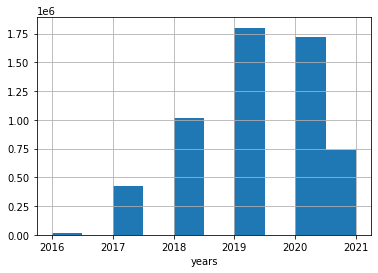

In [10]:
plt.hist(potrojari_df['year'])


plt.xlabel('years')
plt.ylabel('')
plt.title('')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

In [11]:
month_map ={
    '1': 'January',
    '01': 'January',
    '2': 'February',
    '02': 'February',
    '3': 'March',
    '03': 'March',
    '4': 'April',
    '04': 'April',
    '5': 'May',
    '05': 'May',
    '6': 'June',
    '06': 'June',
    '7': 'July',
    '07': 'July',
    '8': 'August',
    '08': 'August',
    '9': 'September',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December',
    'unknown': 'unknown',
}

In [12]:
# Generate general_series and drilldown series for bar graph
# general series: year: number of officess
dataframe_year_by = potrojari_df.groupby('year')

def generate_general_series_drilldown_series(dataframe_year_by, general_series_name):
    general_series = [
        
        {
            'name': general_series_name,
            'colorByPoint': True,
            'data': [],
        }
    ]
    drilldown_series = []

    for year, year_frame in dataframe_year_by:
        year = str(year)
        # year, year_frame.shape
        temporary_dict_general = {'name': year, 'y': year_frame.shape[0], 'drilldown': year}
        general_series[0]['data'].append(temporary_dict_general)
        temporary_dict_drilldown = {
            'name': year,
            'id': year,
            'data': [],
        }
        month_group_by = year_frame.groupby('month')
        for month, month_frame in month_group_by:
          
            # mg, mf.shape[0]
            month = str(month)
            month = month_map[month]

            lst = [month, month_frame.shape[0]]
            # lst = [month, month_frame['upokarvogi'].sum()]
            temporary_dict_drilldown['data'].append(lst)
        drilldown_series.append(temporary_dict_drilldown)
    return general_series, drilldown_series

general_series, drilldown_series = generate_general_series_drilldown_series(dataframe_year_by, 'years')


In [14]:
general_series
drilldown_series[0]

[{'name': 'years',
  'colorByPoint': True,
  'data': [{'name': '2016', 'y': 13452, 'drilldown': '2016'},
   {'name': '2017', 'y': 425547, 'drilldown': '2017'},
   {'name': '2018', 'y': 1012275, 'drilldown': '2018'},
   {'name': '2019', 'y': 1800514, 'drilldown': '2019'},
   {'name': '2020', 'y': 1723124, 'drilldown': '2020'},
   {'name': '2021', 'y': 736875, 'drilldown': '2021'}]}]

{'name': '2016',
 'id': '2016',
 'data': [['October', 1541],
  ['November', 2280],
  ['December', 5385],
  ['February', 47],
  ['March', 159],
  ['April', 99],
  ['May', 237],
  ['June', 308],
  ['July', 427],
  ['August', 1520],
  ['September', 1449]]}

In [30]:

month_list =['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October','November', 'December', 'unknown' ]
potrojari = {}
from collections import OrderedDict
dataframe_year_by = potrojari_df.groupby('year')

for year, year_frame in dataframe_year_by:
    year = str(year)
    # year, year_frame.shape
    
    month_dict = {}

    month_group_by = year_frame.groupby('month')
    for month, month_frame in month_group_by:

        # mg, mf.shape[0]
        month = str(month)
        month = month_map[month]
        month_dict[month] = int(month_frame.shape[0])
    # month_dict
    month_dict = dict(sorted(month_dict.items(), key=lambda x:month_list.index(x[0])))
    month_dict
    dic = {'count': int(year_frame.shape[0]), 'month_map': month_dict}
    potrojari[year] = dic

# print(potrojari.keys())
# potrojari['2016']

{'February': 47,
 'March': 159,
 'April': 99,
 'May': 237,
 'June': 308,
 'July': 427,
 'August': 1520,
 'September': 1449,
 'October': 1541,
 'November': 2280,
 'December': 5385}

{'January': 8382,
 'February': 13140,
 'March': 18051,
 'April': 27706,
 'May': 26504,
 'June': 18430,
 'July': 50608,
 'August': 54681,
 'September': 41508,
 'October': 56079,
 'November': 64096,
 'December': 46362}

{'January': 67008,
 'February': 55392,
 'March': 62302,
 'April': 81640,
 'May': 81534,
 'June': 70789,
 'July': 83695,
 'August': 87411,
 'September': 105538,
 'October': 115338,
 'November': 100934,
 'December': 100694}

{'January': 123830,
 'February': 115079,
 'March': 127327,
 'April': 132304,
 'May': 124402,
 'June': 102173,
 'July': 155883,
 'August': 138780,
 'September': 191353,
 'October': 205358,
 'November': 189738,
 'December': 194287}

{'January': 207154,
 'February': 208844,
 'March': 155073,
 'April': 36943,
 'May': 46325,
 'June': 108839,
 'July': 149293,
 'August': 179691,
 'September': 253212,
 'October': 205446,
 'November': 114886,
 'December': 57418}

{'January': 21620,
 'February': 22212,
 'March': 24055,
 'April': 16641,
 'May': 73533,
 'June': 113281,
 'July': 68327,
 'August': 97606,
 'September': 110275,
 'October': 104473,
 'November': 84852}

In [31]:
# sorted(.items(),key =lambda x:months.index(x[0]))
# sorted(potrojari['2016']['month_map'].items(), key=lambda x:month_list.index(x[0]))

In [32]:
import json

dictionary = potrojari

with open('../Cleaned_data/potrojari.json', 'w', encoding='utf-8') as f:
    json.dump(dictionary, f, ensure_ascii=False, indent=4)

with open('../Cleaned_data/potrojari.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)
    print(data)

{'2016': {'count': 13452, 'month_map': {'February': 47, 'March': 159, 'April': 99, 'May': 237, 'June': 308, 'July': 427, 'August': 1520, 'September': 1449, 'October': 1541, 'November': 2280, 'December': 5385}}, '2017': {'count': 425547, 'month_map': {'January': 8382, 'February': 13140, 'March': 18051, 'April': 27706, 'May': 26504, 'June': 18430, 'July': 50608, 'August': 54681, 'September': 41508, 'October': 56079, 'November': 64096, 'December': 46362}}, '2018': {'count': 1012275, 'month_map': {'January': 67008, 'February': 55392, 'March': 62302, 'April': 81640, 'May': 81534, 'June': 70789, 'July': 83695, 'August': 87411, 'September': 105538, 'October': 115338, 'November': 100934, 'December': 100694}}, '2019': {'count': 1800514, 'month_map': {'January': 123830, 'February': 115079, 'March': 127327, 'April': 132304, 'May': 124402, 'June': 102173, 'July': 155883, 'August': 138780, 'September': 191353, 'October': 205358, 'November': 189738, 'December': 194287}}, '2020': {'count': 1723124, '